# Principal Component Analysis

## 1. Assumption

* __Linearity__

Assume the data set to be linear combinations of the variables.

* __The importance of mean and covariance__

There is no guarantee that the directions of maximum variance will contain good features for discrimination.

* __That large variances have important dynamics__

Assumes that components with larger variance correspond to interesting dynamics and lower ones correspond to noise.


## 2. Algorithm
1) Prepare the data :

- Center the data : subtract the mean from each variables. This produces a data set whose mean is zero.
- Scale the data : If the variances of the variables in your data are significantly different, it’s a good idea to scale the data to unit variance. This is achieved by dividing each variables by its standard deviation.

2) Calculate the covariance/correlation matrix

3) Calculate the eigenvectors and the eigenvalues of the covariance matrix

4) Choose principal components : eigenvectors are ordered by eigenvalues from the highest to the lowest. The number of chosen eigenvectors will be the number of dimensions of the new data set. 

5) Compute the new dataset.

__Note__: 

Mean subtraction is necessary for performing PCA to ensure that the first principal component describes the direction of maximum variance. If mean subtraction is not performed, the first principal component might instead correspond more or less to the mean of the data. 

Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.

## 3. Goals of PCA

- Simplification
- Data reduction
- Modeling
- Outlier detection
- Variable selection
- Classification (unsupervised)
- Unmixing (curve resolution)

## 3. Basic Statistics

- Mean: $\bar{X}=\frac{\sum{X}}{n}$

- Variance: $Var(X)=\frac{\sum_{i=1}^{n}(X-\bar{X})^2}{n-1}$

- Covariance: $Cov(X,Y)=\frac{\sum_{i=1}^{n}(X-\bar{X})(Y-\bar{Y})}{n-1}$

- Covariance Matrix: $C=\begin{bmatrix}cov(x,x) & cov(x,y) & cov(x,z)\\cov(y,x) & cov(y,y) & cov(y,z)\\cov(z,x) & cov(z,y) & cov(z,z)\end{bmatrix}$

## 4. Definition

PCA seeks a linear combination of variables such that the maximum variance is extracted from the variables. It then removes this variance and seeks a second linear combination which explains the maximum proportion of the remaining variance, and so on. This is called the principal axis method and results in orthogonal (uncorrelated) factors. PCA analyzes total (common and unique) variance. The following are four equivalent definitions:



### 4.1 Orthogonal directions with largest variance
- PC 1 is direction of largest variance
- PC 2 is perpendicular to PC 1; again largest variance
- PC 3 is perpendicular to PC 1, PC 2; again largest variance

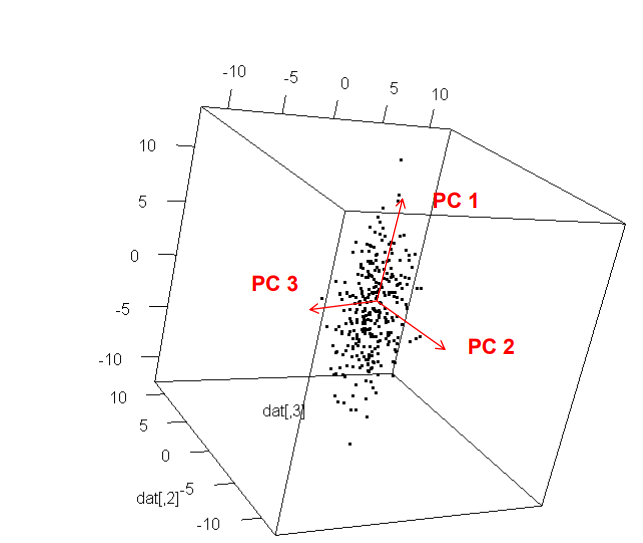

In [1]:
from IPython.display import Image
Image(filename='orthogonal directions.png')

### 4.2 Linear subspace with minimal sqaured residuals
It is the linear projection that minimizes the average projection cost (mean squared distance between the data points and
their projections).

- PC 1: Straight line with smallest orthogonal distance to all points
- PC 1 & PC 2: Plane with with smallest orthogonal distance to all points

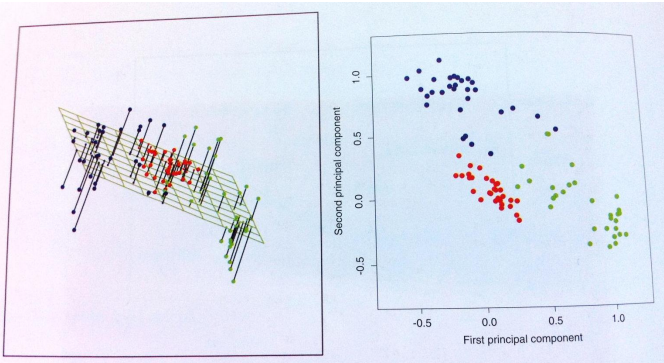

In [2]:
from IPython.display import Image
Image(filename='best subspace.png')

### 4.3 Eigendecomposition of the covariance matrix
- Every symmetric, positive semidefinite matrix A can be rewritten as: $\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{T}$, where  $\Lambda$ is diagonal and Q is orthogonal
- Eigenvectors of Covariance/Correlation matrix are PC’s. Q is the square (N×N) matrix whose ith column is the eigenvector $q_{i}$ of A
- $\Lambda$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues


### 4. 4 Singular Vector Decomposition of the data matrix
- Every R can be rewritten as $R=UDV^T$ where D is diagonol and U,V are orthogonal.
- Column of V are PC'c
- Diagonal entries of D are "singular values"; related to standard deviation along PC's (usually sorted in decreasing order)
- UD contains samples measures in PC coordinates

### 5. Relationship between PCA and SVD
PCA can be done by eigenvalue decomposition of a data covariance matrix or singular value decomposition of a data matrix, usually after mean centering the data for each attribute.

If X is our data matrix with n rows being the observations and with mean-centered columns, then $C=\frac{1}{n−1}X^{T}X$ is the covariance matrix. It is a symmetrix matrix, and therefore to find eigenvalues of C we can use eigendecomposition $C=QΛQ^T$. Then the principal components are the columns of Q (eigenvectors) and the variance along the directions are the values in $\Lambda$ (eigenvalues).

Then recall that SVD of X is $X=UDV^{T}$. Since U,V are orthogonal and D is diagonol,  $X^{T}X=(UDV^{T})^T(UDV^{T})=(VDU^{T})(UDV^{T})=VD^2V^T$. Thus V contains the eigenvectors of $X^{T}X$ and $D^2$ contains the eigenvalues of $X^TX$.

$X^TX$ is a called a scatter matrix and it is nothing more than the covariance matrix C scaled by $\frac{1}{(n−1)}$. Scaling doesn't not change the principal directions, and therefore SVD of X can also be used to solve the PCA problem.



## 6. Scores and Loadings

__Scores__

- Map of samples
- Displays distribution of samples in the new space defined by the PC's

__Loadings__

- Map of variables
- Show how the original varibales are related to the PC's

__Interpret Biplot__

A Biplot is an enhanced scatterplot that uses both points and vectors to represent structure.


## 7. Pros and Cons
__Pros__:
- Can deal with large datasets (both in objects and variables)
- There are no special assumptions on the data and PCA can be applied on all data-sets

__Cons__:
- PCA is not scale invariant
- The directions with largest variance are assumed to be of most interest
- Only considers orthogonal transformations (rotations) of the original variables
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this but some are not
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances

## 8. Applications
* Exploratory data analysis
* Data preprocessing, dimensionality reduction
* Data compression, data reconstruction
* PCA in linear regression

  1) Identification and elimination of multicolinearities in the data.

  2) Reduction in the dimension of the input space leading to fewer parameters and “easier” regression.


## 9. Other Dimensionality Reduction Techniques
* __Stepwise Selection___
* __Regularization__
* __Multidimensional Scaling (MDS)__
* __Isomap__
* __t-Distributed Stochastic Neighbor Embedding (t-SNE)__ reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization.
* __Linear Discriminant Analysis (LDA)__ is actually a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data.

  * LDA(supervised) -> projections that maximize separation
  * PCA(unsupervised) -> projections that explain the maximum variability overall
  


## 10. Sample Code

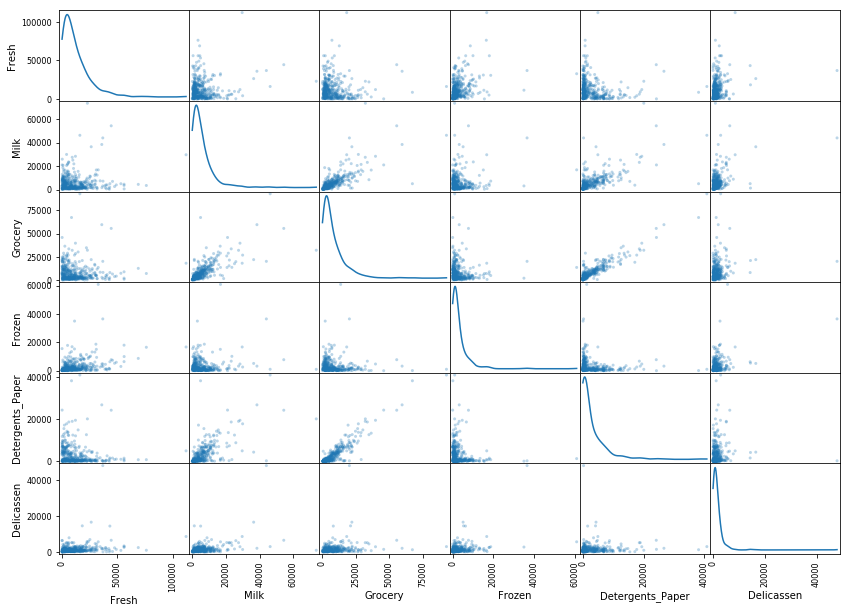

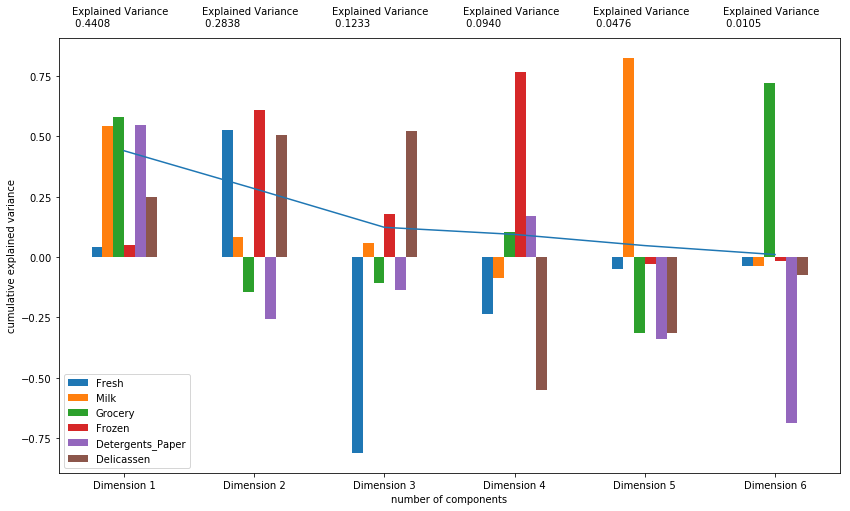

'\nThe biplot above shows that the products milk, grocery, and detergents_paper are aligned towards the principal component 1 or dimension 1. \nWhereas the fresh and frozen products are aligned towards the principal component 2 or dimension 2. \nThese seem intuitive as we have already seen their relationship in the scatter plot above where there seems to be a linear relationship \nbetween the group of products milk, grocery and detergents_paper and fresh and frozen products. \nHence principal component analysis reduced the overall dimension of the dataset from six variables to two variables \nby also removed multicollinearity in the data by aligning the related variables into their respective principal components or dimensions\n'

In [1]:
# =============================================================================
# Import Packages
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
data = data.drop(["Channel", "Region"], axis=1)
data.head()

# =============================================================================
# EDA
# =============================================================================
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal='kde');
plt.show()

"""
From the above scatter-plots, it seems there is a linear relationship between the spending habits of milk, 
]grocery and detergents_paper items. Also, there might be a linear relationship between spending habits on fresh and frozen products. 
Let’s now try to analyze the dataset by creating six principal components
"""
# =============================================================================
# sklearn.decomposition.PCA
# =============================================================================
# scaling the data before PCA
data = pd.DataFrame(scale(data), columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

# implementing PCA
pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

np.corrcoef(pca_samples.T)     #  the samples components do no longer carry any linear correlation

# =============================================================================
# Visualization
# =============================================================================
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)
pca_results.cumsum()

# Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

"""
From the below plot we can observe that we got that elbow in the plot corresponding to the 2nd number of principal components. 
Hence we should use only two number of principal components in our analysis.
"""

# Biplot
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

biplot(data, reduced_data, pca)

"""
The biplot above shows that the products milk, grocery, and detergents_paper are aligned towards the principal component 1 or dimension 1. 
Whereas the fresh and frozen products are aligned towards the principal component 2 or dimension 2. 
These seem intuitive as we have already seen their relationship in the scatter plot above where there seems to be a linear relationship 
between the group of products milk, grocery and detergents_paper and fresh and frozen products. 
Hence principal component analysis reduced the overall dimension of the dataset from six variables to two variables 
by also removed multicollinearity in the data by aligning the related variables into their respective principal components or dimensions
"""

# Linear Discriminant Analysis

## 1. Assumptions
1. __Equality of Variance-Covariance Matrices:__
   - Variances of discriminating variables must be the same in the respective populations.
   - Correlation (or covariance) between any two variables is the same in the respective populations.  
   
2. __Multivariate Normality:__
  
   DA assumes that the underlying structure of the data for each group is multivariate normal. Such a distribution exists when      each variable has a normal distribution about fixed values on all others. 
     
3. __Sigularities and Multicollinearity:__

   DA requires that no discriminating variable be perfectly correlated with another variable (i.e., r=1) or derived from a          linear combination of other variables in the data set being analyzed (i.e., the matrix must be nonsingular). 
   
4. __Independent samples (& effects of outliers):__

  DA assumes that random samples of observation vectors (i.e., the discriminating characteristics) have been drawn independently   from respective P-dimensional multivariate normal populations.
   
5. __Prior probabilities identifiable:__

   Priors represent the probability that a sample of the ith group will be submitted to the classifier; priors effect the form      of the classification function. DA assumes that prior probabilities of group membership are identifiable (not necessarily        equal).
   
6. __Linearity:__

   The appropriateness and effectiveness DA depends on the implicit assumption that variables change linearly along underlying      gradients and that there exits linear relationships among the variables such that they can be combined in a linear fashion to    create canonical functions.

## 2. How to Prepare Data for LDA
* __Classification Problems.__ This might go without saying, but LDA is intended for classification problems where the output variable is categorical. LDA supports both binary and multi-class classification.

* __Gaussian Distribution.__ The standard implementation of the model assumes a Gaussian distribution of the input variables. Consider reviewing the univariate distributions of each attribute and using transforms to make them more Gaussian-looking (e.g. log and root for exponential distributions and Box-Cox for skewed distributions).

* __Remove Outliers.__ Consider removing outliers from your data. These can skew the basic statistics used to separate classes in LDA such the mean and the standard deviation.

* __Same Variance.__ LDA assumes that each input variable has the same variance. It is almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1.

## 3. Extensions to LDA
* __Quadratic Discriminant Analysis (QDA)__: Each class uses its own estimate of variance (or covariance when there are multiple input variables).

* __Flexible Discriminant Analysis (FDA):__ Where non-linear combinations of inputs is used such as splines.

* __Regularized Discriminant Analysis (RDA):__ Introduces regularization into the estimate of the variance (actually covariance), moderating the influence of different variables on LDA.

##  4. Comparison LDA with PCA
Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction (both are techniques for the data Matrix Factorization). The most important difference between both techniques is that PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset, while that the LDA is a “supervised” algorithm that computes the directions (“linear discriminants”) representing the axes that maximize the separation between multiple classes.

Another difference is that in PCA, there is no assumption on the data points being distributed normally. However, if the data points come from other distributions, PCA is only really approximating their features via their first two moments, so it’s not really optimal unless the data points are normally distributed. On the other hand, In LDA,  you explicitly assume that the data points come from two separate multivariate normal distributions with different means but the same covariance matrix. This makes LDA a less generalized method compared to PCA.

PCA can also be performed before LDA to regularize the problem and avoid over-fitting. It is not a good strategy for sure but it is a possible strategy.

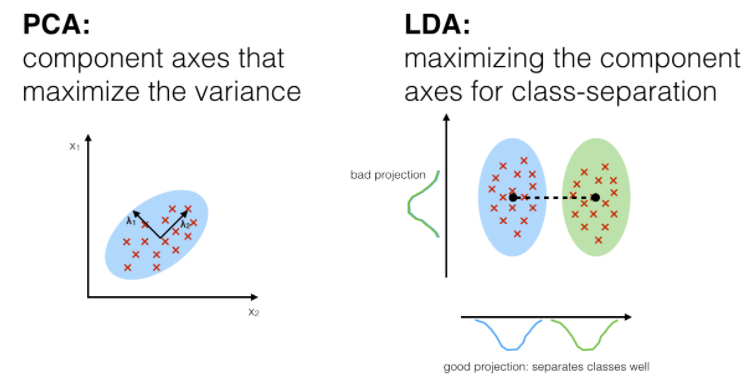

In [1]:
from IPython.display import Image
Image(filename='LDA & PCA.png')

## 5. Sample Code

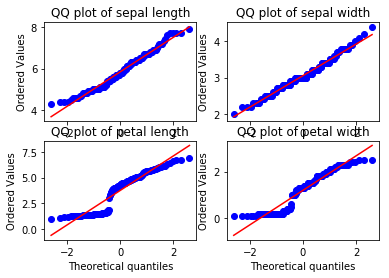

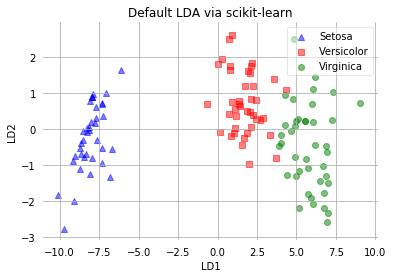

[ 0.31666667  0.34166667  0.34166667]
[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
0.966666666667


In [2]:
# =============================================================================
# Import Packages
# =============================================================================
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



# =============================================================================
# Load Packages
# =============================================================================
df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length',
                  'sepal width',
                  'petal length',
                  'petal width', ))}
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end
df.tail()

# =============================================================================
# EDA
# =============================================================================
fig, ax = plt.subplots(nrows=2, ncols=2)

for i in range(0,4):
    plt.subplot(2, 2, i+1)
    stats.probplot(df.iloc[:,i], dist='norm', plot=pylab)
    pylab.title('QQ plot of ' + df.columns[i])

pylab.show()


# =============================================================================
# Label Encode
# =============================================================================
X = df.iloc[:,0:4].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}


# =============================================================================
# Splitting the dataset into the Training set and Test set
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# =============================================================================
# Feature Scaling to Dataset
# =============================================================================
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# =============================================================================
# LDA
# =============================================================================
sklearn_lda = LDA(n_components=2)
X_train_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
X_test_lda_sklearn = sklearn_lda.transform(X_test)


# =============================================================================
# Visualization 
# =============================================================================
def plot_scikit_lda(X, y, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_scikit_lda(X_train_lda_sklearn, y_train, title='Default LDA via scikit-learn')


# =============================================================================
# Prediction
# =============================================================================
# prior probability
print(sklearn_lda.priors_)

# confusion matrix
pred_test = sklearn_lda.predict(X_test)
print(confusion_matrix(pred_test, y_test))

# accuracy
print(np.mean(pred_test==y_test))

# Factor Analysis

## 1. Assumption
* __Normality__: Statistical inference is improved if the variables are multivariate normal
* __Linear relations__ between variables - Test by visually examining all or at least some of the bivariate scatterplots
* __Factorability__ is the assumption that there are at least some correlations amongst the variables so that coherent factors can be identified. Basically, there should be some degree of collinearity among the variables but not an extreme degree or singularity among the variables.
* __Sample Size__: The sample size should be large enough to yield reliable estimates of correlations among the variables

## 2. Comparison between PCA and FA
__Principal Component Analysis (PCA)__

  * Is a variable reduction technique
  * Is used when variables are highly correlated
  * Reduces the number of observed variables to a smaller number of principal components which account for most of the variance of the observed variables
  * Is a large sample procedure
  
__Exploratory Factor Analysis (EFA)__

* Is a variable reduction technique which identifies the number of latent constructs and the underlying factor structure of a set of variables
* Hypothesizes an underlying construct, a variable not measured directly
* Estimates factors which influence responses on observed variables
* Allows you to describe and identify the number of latent constructs (factors)
* Includes unique factors, error due to unreliability in measurement
* Traditionally has been used to explore the possible underlying factor structure of a set of measured variables without imposing any preconceived structure on the outcome

__ Difference__

* These techniques are typically used to analyze groups of correlated variables representing one or more common domains; for example, indicators of socioeconomic status, job satisfaction, health, self-esteem, political attitudes or family values. Principal components analysis is used to find optimal ways of __combining variables__ into a small number of subsets, while factor analysis may be used to identify the __structure underlying such variables__ and to estimate scores to measure latent factors themselves. The main applications of these techniques can be found in the analysis of multiple indicators, measurement and validation of complex constructs, index and scale construction, and data reduction. These approaches are particularly useful in situations where the dimensionality of data and its structural composition are not well known.

* When an investigator has a set of hypotheses that form the conceptual basis for her/his factor analysis, the investigator performs a confirmatory, or hypothesis testing, factor analysis. In contrast, when there are no guiding hypotheses, when the question is simply what are the underlying factors the investigator conducts an exploratory factor analysis. The factors in factor analysis are conceptualized as __"real world" entities__ such as depression, anxiety, and disturbed thought. This is in contrast to principal components analysis (PCA), where the components are simply __geometrical abstractions__ that may not map easily onto real world phenomena.

* Another difference between the two approaches has to do with the variance that is analyzed. In PCA, __all of the observed variance__ is analyzed, while in factor analysis it is only the __shared variances__ that is analyzed.

# 3. Sample Code

In [1]:
# =============================================================================
# Import Packages
# =============================================================================
import pandas as pd
from sklearn import decomposition, preprocessing

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
data = data.drop(["Channel", "Region"], axis=1)
data.head()


# =============================================================================
# sklearn.decomposition.FactorAnalysis
# =============================================================================
# scaling the data before FA
data_normal = preprocessing.scale(data)

fa = decomposition.FactorAnalysis(n_components=2)
fa.fit(data_normal)

print (fa.components_)
df = pd.DataFrame(fa.components_.transpose(), index=data.columns, columns=['factor 1', 'factor 2'])
df


"""
                  factor 1  factor 2
Fresh            -0.047160  0.423627
Milk              0.732284  0.360762
Grocery           0.968583  0.058966
Frozen           -0.072645  0.564214
Detergents_Paper  0.961895 -0.122233
Delicassen        0.167762  0.722710


factor1: grocery, detergents_paper, milk
factor2: delicassen, frozen, fresh

The result is similar to that of PCA
"""

[[-0.04716042  0.73228405  0.96858283 -0.07264492  0.96189501  0.16776173]
 [ 0.42362717  0.36076243  0.05896613  0.5642138  -0.1222328   0.72270992]]


'\n                  factor 1  factor 2\nFresh            -0.047160  0.423627\nMilk              0.732284  0.360762\nGrocery           0.968583  0.058966\nFrozen           -0.072645  0.564214\nDetergents_Paper  0.961895 -0.122233\nDelicassen        0.167762  0.722710\n\n\nfactor1: grocery, detergents_paper, milk\nfactor2: delicassen, frozen, fresh\n\nThe result is similar to that of PCA\n'

## Reference 

### PCA

Definitions: http://chem-eng.utoronto.ca/~datamining/Presentations/PCA.pdf

Sample Code: https://analyticsdefined.com/implementing-principal-component-analysis/

SVD & PCA: https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca

### LDA

Assumptions: http://www.umass.edu/landeco/teaching/multivariate/schedule/discriminate2.pdf

LDA & PCA; https://www.quora.com/What-is-the-difference-between-LDA-and-PCA-for-dimension-reduction

### FA
Assumptions: https://en.wikiversity.org/wiki/Exploratory_factor_analysis/Assumptions

Comparison 1: http://www2.sas.com/proceedings/sugi30/203-30.pdf

Comparison 2: http://psych.wisc.edu/henriques/pca.html